In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

C:\Users\mhd_gamer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_dir = 'C:/Users/mhd_gamer/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_dir = 'C:/Users/mhd_gamer/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [94]:
def preprocess_image(image):
    # Apply basic thresholding to separate hair from skin
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
    binary_mask = cv2.resize(binary_mask, (image.shape[1], image.shape[0]))
    binary_mask = np.uint8(binary_mask)
    # Apply the binary mask to the original image
    hair_removal_result = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Normalize pixel values to between 0 and 1
    hair_removal_result = hair_removal_result / 255.0
    
    return hair_removal_result


In [95]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

In [96]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [97]:
classes=list(train_generator.class_indices.keys())
classes
num_classes = len(classes)

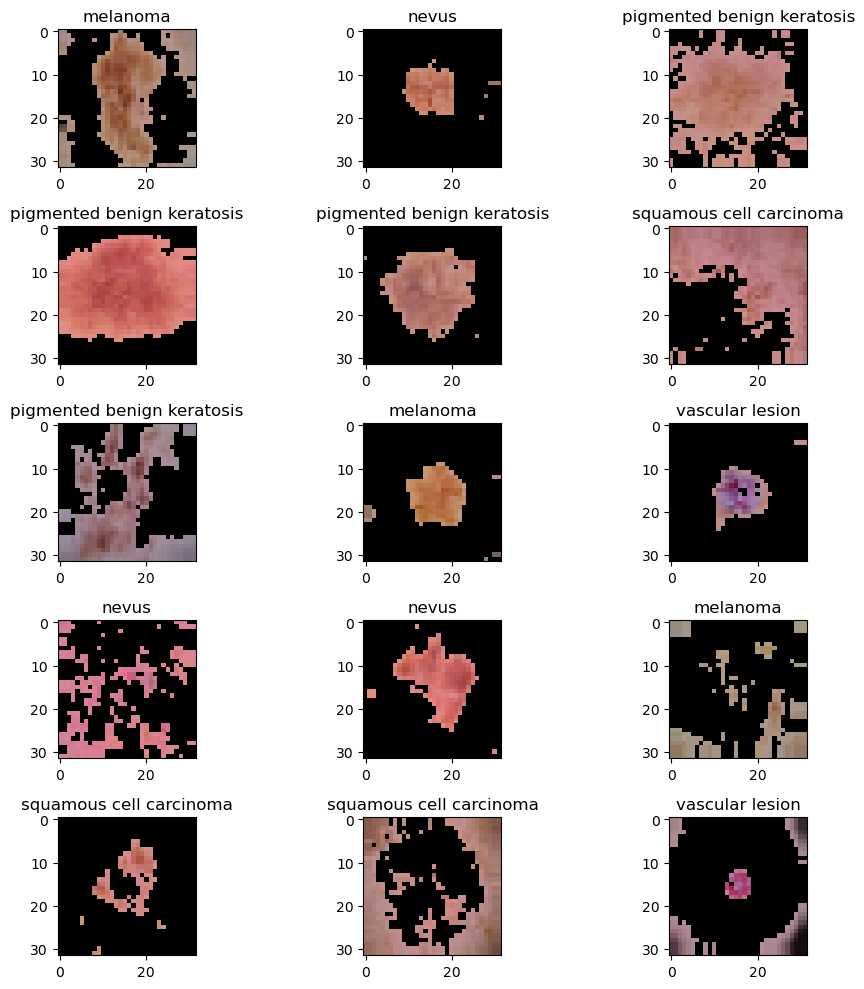

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(classes[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [99]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # Adjust based on your number of classes


In [100]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

# Compile the model with the chosen optimizer
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
70/70 [==============================] - 26s 367ms/step - loss: 1.9862 - accuracy: 0.2568 - val_loss: 2.1930 - val_accuracy: 0.2373
Epoch 2/10
70/70 [==============================] - 24s 349ms/step - loss: 1.7392 - accuracy: 0.3676 - val_loss: 2.2617 - val_accuracy: 0.2542
Epoch 3/10
70/70 [==============================] - 25s 353ms/step - loss: 1.5878 - accuracy: 0.4252 - val_loss: 2.1618 - val_accuracy: 0.2458
Epoch 4/10
70/70 [==============================] - 24s 346ms/step - loss: 1.5313 - accuracy: 0.4542 - val_loss: 2.4446 - val_accuracy: 0.2288
Epoch 5/10
70/70 [==============================] - 24s 350ms/step - loss: 1.4968 - accuracy: 0.4676 - val_loss: 2.2423 - val_accuracy: 0.2627
Epoch 6/10
70/70 [==============================] - 28s 400ms/step - loss: 1.4601 - accuracy: 0.4757 - val_loss: 2.1806 - val_accuracy: 0.3220
Epoch 7/10
70/70 [==============================] - 29s 411ms/step - loss: 1.4110 - accuracy: 0.4926 - val_loss: 2.2118 - val_accuracy: 0.3390

In [102]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 5s 948ms/step - loss: 2.1259 - accuracy: 0.4153
Test accuracy: 0.41525423526763916
